In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

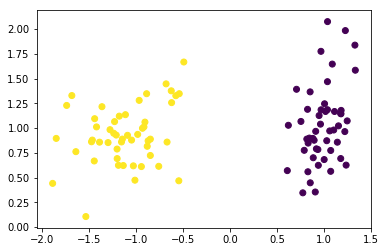

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
class PotentialFunctionsClassifier:
    
    def __init__(self, X, y, alpha=1e-6, k_neighbours = None):
        
        self.X = X
        self.y = y
        self.alpha = alpha
        self.weights = np.zeros((X.shape[0]))
        if k_neighbours == None:
            self.k_neighbours = y.shape[0]
        else:
            self.k_neighbours = k_neighbours
            
        self.fit(X, y)
        
    def fit(self, X, y, epsilon = 1):
        
        iterations_count = 0
        error = epsilon + 1
        
        while error > epsilon:

            iterations_count += 1

            predictions = []

            for i, (x, label) in enumerate(zip(X, y)):

                pred = self.predict(x)

                if pred != label:            
                    self.weights[i] += 1

                predictions.append(pred)

            error = np.sum(np.array((predictions != y)))
                           
        print("Fit in {} iterations".format(iterations_count))
        
    def predict(self, x):
                           
        distances = np.array([np.linalg.norm(x - x_train) for x_train in self.X])
        top_k_indices = np.argsort(distances)[:self.k_neighbours]
        
        potentials = [np.sum((self.y[top_k_indices] == label) * self.weights[top_k_indices] *
                           (1.0 / (distances[top_k_indices] + self.alpha))) for label in np.unique(self.y)]       
            
        class_label = np.argmax(potentials)
            
        return class_label

In [5]:
classifier = PotentialFunctionsClassifier(X, y)

Fit in 2 iterations


In [6]:
our_point = [-1.5, 1.0]

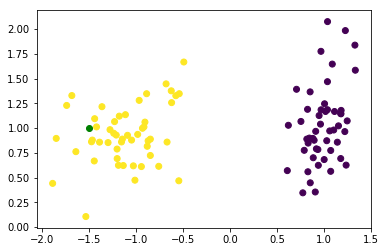

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(our_point[0], our_point[1], c='green')

In [8]:
prediction = classifier.predict(our_point)

if prediction == 1:
    print("Yellow")
else:
    print("Violet")

Yellow
